/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ds1 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_selfshield_z15/DD0600/DD0600')
ds2 = yt.load('/Users/rsimons/Dropbox/rcs_foggie/data/halo_008508/nref11n_nref10f_selfshield_z6/DD0600/DD0600')

ad1 = ds1.all_data()
ad2 = ds2.all_data()

yt : [INFO     ] 2018-11-12 11:32:24,567 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-12 11:32:24,569 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-11-12 11:32:24,570 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-11-12 11:32:24,572 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-11-12 11:32:24,574 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-11-12 11:32:24,575 Parameters: current_redshift          = 1.67203863787
yt : [INFO     ] 2018-11-12 11:32:24,577 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-11-12 11:32:24,578 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-11-12 11:32:24,580 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-11-12 11:32:24,605 Parameters: current_time              = 183.066527818
yt : [INFO     ] 2018-11-12 11:32:24,607 Parameters: domain_dimensions         = [256 256 25

In [3]:
'''
fig, axes = plt.subplots(1,1,figsize = (8,8))


axes.hist(log10(ad1['gas', 'density'].to('Msun/kpc**3').value.ravel()), label = 'natural', histtype = 'step', linewidth = 8)
axes.hist(log10(ad2['gas', 'density'].to('Msun/kpc**3').value.ravel()), label = 'forced', histtype = 'step', linewidth = 8)

axes.set_xlim(-0.05, 6)

legend(fontsize = 25)
axes.set_xlabel(r'gas mass density (M$_{\odot}$ kpc$^{-3}$)', fontsize = 20)
axes.set_ylabel(r'number', fontsize = 20)
'''

"\nfig, axes = plt.subplots(1,1,figsize = (8,8))\n\n\naxes.hist(log10(ad1['gas', 'density'].to('Msun/kpc**3').value.ravel()), label = 'natural', histtype = 'step', linewidth = 8)\naxes.hist(log10(ad2['gas', 'density'].to('Msun/kpc**3').value.ravel()), label = 'forced', histtype = 'step', linewidth = 8)\n\naxes.set_xlim(-0.05, 6)\n\nlegend(fontsize = 25)\naxes.set_xlabel(r'gas mass density (M$_{\\odot}$ kpc$^{-3}$)', fontsize = 20)\naxes.set_ylabel(r'number', fontsize = 20)\n"

In [4]:
anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1, anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1, anchor_xs_avg1, anchor_ys_avg1, anchor_zs_avg1, anchor_vxs_avg1, anchor_vys_avg1, anchor_vzs_avg1 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_selfshield_z15_DD0600_cen.npy')[()]
anchor_xs_box_avg2, anchor_ys_box_avg2, anchor_zs_box_avg2, anchor_vxs_box_avg2, anchor_vys_box_avg2, anchor_vzs_box_avg2, anchor_xs_avg2, anchor_ys_avg2, anchor_zs_avg2, anchor_vxs_avg2, anchor_vys_avg2, anchor_vzs_avg2 = np.load('/Users/rsimons/Dropbox/rcs_foggie/outputs/anchor_files/nref11n_nref10f_selfshield_z6_DD0600_cen.npy')[()]

In [5]:
W1 = yt.YTArray([15, 15, 5], 'kpc')
N = 1024
north_vector = [0,1,0]

cen1 = yt.YTArray([anchor_xs_box_avg1, anchor_ys_box_avg1, anchor_zs_box_avg1], 'kpc')
cen2 = yt.YTArray([anchor_xs_box_avg2, anchor_ys_box_avg2, anchor_zs_box_avg2], 'kpc')

L1 = yt.YTArray([anchor_vxs_box_avg1, anchor_vys_box_avg1, anchor_vzs_box_avg1], 'km/s')
L2 = yt.YTArray([anchor_vxs_box_avg2, anchor_vys_box_avg2, anchor_vzs_box_avg2], 'km/s')

L1_mag = sqrt(sum(L1**2))
L2_mag = sqrt(sum(L2**2))


L_n1 = L1/L1_mag
L_n2 = L2/L2_mag



cenS1 = cen1 + yt.YTArray(10, 'kpc') * L_n1
cenS2 = cen2 + yt.YTArray(10, 'kpc') * L_n2
    
    
    

In [6]:
cp1 = ds1.cutting(L1, cenS1, north_vector)
cp2 = ds2.cutting(L2, cenS2, north_vector)

frb1 = cp1.to_frb((15, 'kpc'), N)
frb2 = cp2.to_frb((15, 'kpc'), N)


vel_1_dens = frb1["gas", "density"]
vel_2_dens = frb2["gas", "density"]


vel_1_x = frb1["gas", "velocity_x"].in_units('km/s') - L1[0]
vel_1_y = frb1["gas", "velocity_y"].in_units('km/s') - L1[1]
vel_1_z = frb1["gas", "velocity_z"].in_units('km/s') - L1[2]


vel_1_mag = sqrt(vel_1_x**2 + vel_1_y**2 + vel_1_z**2)


vel_2_x = frb2["gas", "velocity_x"].in_units('km/s') - L2[0]
vel_2_y = frb2["gas", "velocity_y"].in_units('km/s') - L2[1]
vel_2_z = frb2["gas", "velocity_z"].in_units('km/s') - L2[2]
vel_2_mag = sqrt(vel_2_x**2 + vel_2_y**2 + vel_2_z**2)









yt : [INFO     ] 2018-11-12 11:32:24,718 Making a fixed resolution buffer of (('gas', 'density')) 1024 by 1024
Parsing Hierarchy : 100%|██████████| 1177/1177 [00:00<00:00, 29328.18it/s]
yt : [INFO     ] 2018-11-12 11:32:24,832 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-11-12 11:32:27,702 Making a fixed resolution buffer of (('gas', 'density')) 1024 by 1024
Parsing Hierarchy : 100%|██████████| 4254/4254 [00:00<00:00, 18378.60it/s]
yt : [INFO     ] 2018-11-12 11:32:28,165 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-11-12 11:32:33,738 Making a fixed resolution buffer of (('gas', 'velocity_x')) 1024 by 1024
yt : [INFO     ] 2018-11-12 11:32:34,391 Making a fixed resolution buffer of (('gas', 'velocity_y')) 1024 by 1024
yt : [INFO     ] 2018-11-12 11:32:34,786 Making a fixed resolution buffer of (('gas', 'velocity_z')) 1024 by 1024
yt : [INFO     ] 2018-11-12 11:32:35,356 Making a fixed resolution buffer of (('gas', 'velocity_x')) 1024 

"\n\n\nvel_1_L = yt.YTArray(np.zeros((vel_1_dens.shape)) + sqrt(anchor_vxs_avg1**2 + anchor_vys_avg1**2.+anchor_vzs_avg1**2.), 'km/s')\nvel_2_L = yt.YTArray(np.zeros((vel_2_dens.shape)) + sqrt(anchor_vxs_avg2**2 + anchor_vys_avg2**2.+anchor_vzs_avg2**2.), 'km/s')\n\n"

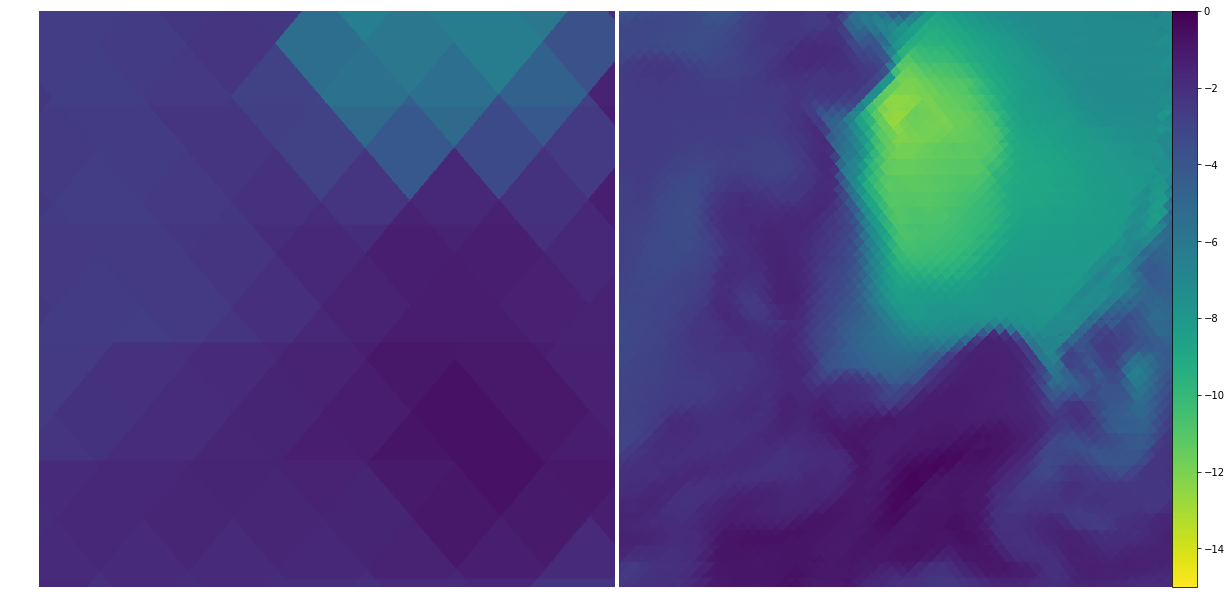

In [7]:
vel_1_dot = (vel_1_x * L1[0] + vel_1_y * L1[1] + vel_1_z * L1[2])/(vel_1_mag * L1_mag)
vel_1_L = -vel_1_mag * vel_1_dot


vel_2_dot = (vel_2_x * L2[0] + vel_2_y * L2[1] + vel_2_z * L2[2])/(vel_2_mag * L2_mag)
vel_2_L = -vel_2_mag * vel_2_dot
fig, axes = plt.subplots(1,2, figsize = (17.5,8))
im1 = axes[0].imshow(vel_1_L.value, vmin = -15, vmax = 0, cmap = cm.viridis_r)
im2 = axes[1].imshow(vel_2_L.value, vmin = -15, vmax = 0, cmap = cm.viridis_r)

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)
'''


vel_1_L = yt.YTArray(np.zeros((vel_1_dens.shape)) + sqrt(anchor_vxs_avg1**2 + anchor_vys_avg1**2.+anchor_vzs_avg1**2.), 'km/s')
vel_2_L = yt.YTArray(np.zeros((vel_2_dens.shape)) + sqrt(anchor_vxs_avg2**2 + anchor_vys_avg2**2.+anchor_vzs_avg2**2.), 'km/s')

'''



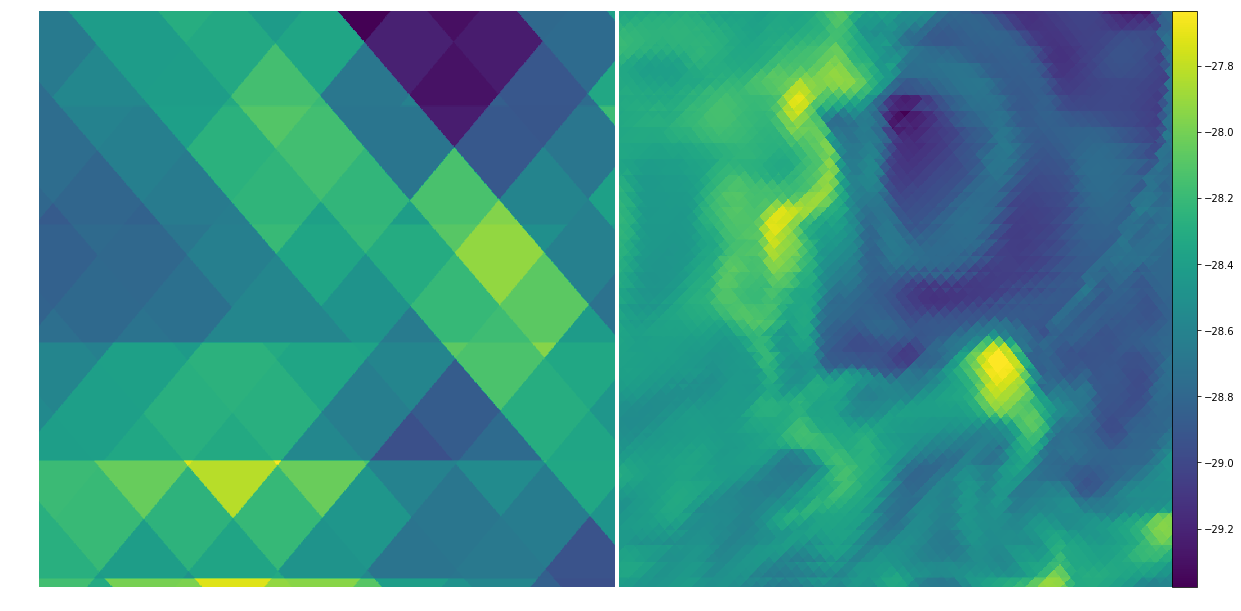

In [8]:
fig, axes = plt.subplots(1,2, figsize = (17.5,8))
im1 = axes[0].imshow(log10(vel_1_dens.value))
im2 = axes[1].imshow(log10(vel_2_dens.value))

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'number')

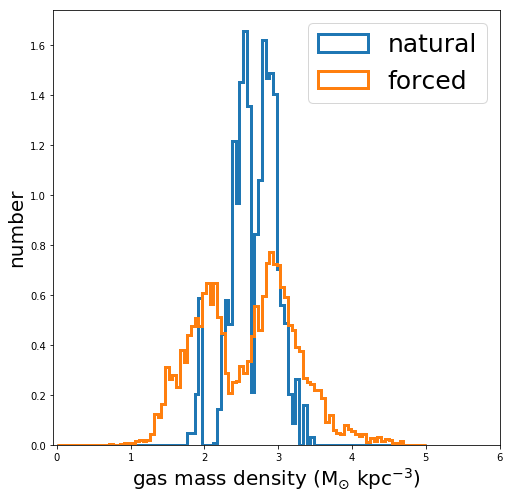

In [9]:
fig, axes = plt.subplots(1,1,figsize = (8,8))

bns = linspace(0,5,100)
axes.hist(log10(vel_1_dens.to('Msun/kpc**3').value.ravel()), label = 'natural', histtype = 'step', linewidth = 3, normed = True, bins = bns)
axes.hist(log10(vel_2_dens.to('Msun/kpc**3').value.ravel()), label = 'forced', histtype = 'step', linewidth = 3, normed = True, bins = bns)

axes.set_xlim(-0.05, 6)
legend(fontsize = 25)
axes.set_xlabel(r'gas mass density (M$_{\odot}$ kpc$^{-3}$)', fontsize = 20)
axes.set_ylabel(r'number', fontsize = 20)






In [10]:
ram_pres_1 = vel_1_dens * vel_1_L**2.
ram_pres_2 = vel_2_dens * vel_2_L**2.

#ram_pres_1[vel_1_L < 0] = nan
#ram_pres_2[vel_2_L < 0] = nan




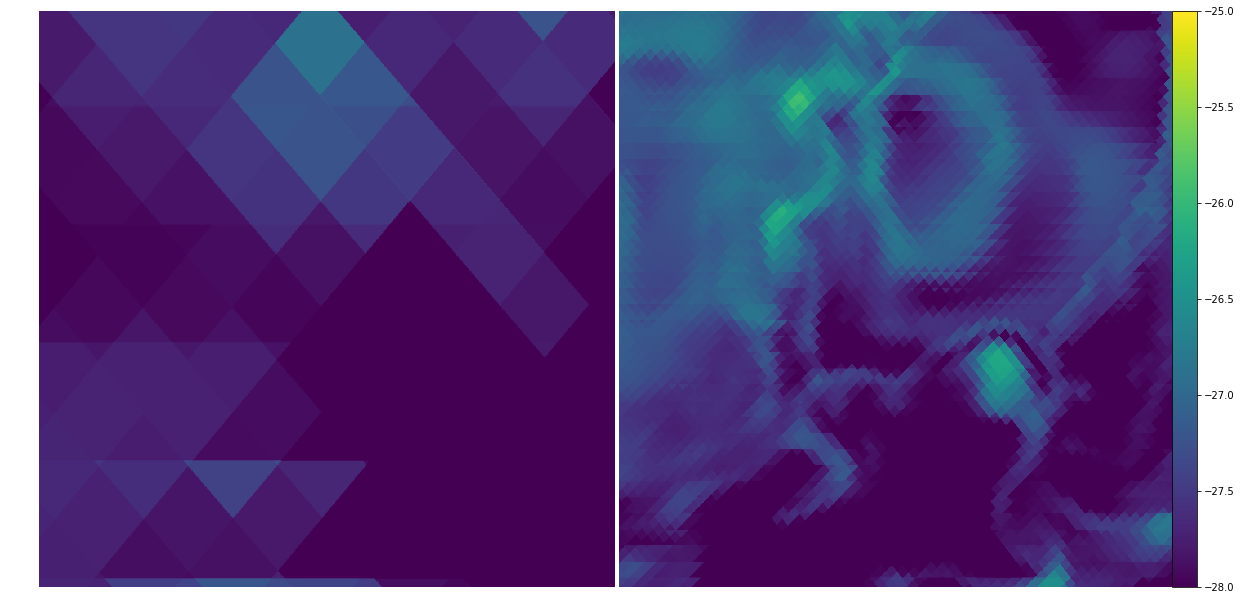

In [11]:
fig, axes = plt.subplots(1,2, figsize = (17.5,8))
im1 = axes[0].imshow(log10(ram_pres_1.value), vmin = -28, vmax = -25)
im2 = axes[1].imshow(log10(ram_pres_2.value), vmin = -28, vmax = -25)

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im1, cax=cax,orientation="vertical")

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)



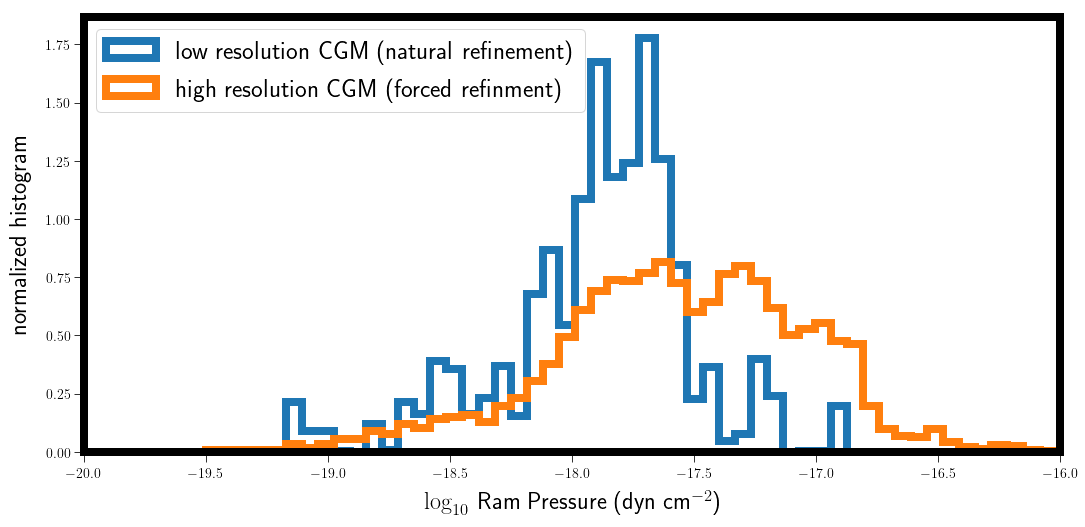

In [29]:
mpl.rcParams['axes.linewidth'] = 8
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10



fig, axes = plt.subplots(1,1, figsize = (17.5,8))


ram_pres_1_rav = ram_pres_1.to('dyn/cm**2').value.ravel()
ram_pres_1_rav = ram_pres_1_rav[~isnan(ram_pres_1_rav)]


ram_pres_2_rav = ram_pres_2.to('dyn/cm**2').value.ravel()
ram_pres_2_rav = ram_pres_2_rav[~isnan(ram_pres_2_rav)]


bns = linspace(-19.5, -13, 100)
axes.hist(log10(ram_pres_1_rav), histtype = 'step', label = 'low resolution CGM (natural refinement)', linewidth = 8, normed = True, bins = bns)
axes.hist(log10(ram_pres_2_rav), histtype = 'step', label = 'high resolution CGM (forced refinment)', linewidth = 8, normed = True, bins = bns)
legend(loc = 2,  fontsize = 25)

axes.set_xlim(-20, -16)

axes.set_xlabel(r'$\log_{10}$ Ram Pressure (dyn cm$^{-2}$) ', fontsize = 24, labelpad = 15)
axes.set_ylabel(r'normalized histogram', fontsize = 24, labelpad = 15)



fig.savefig('ram_pressure_naturalvforced.png', dpi = 500)

In [15]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

In [30]:
sat_dens_1 = yt.off_axis_projection(ds1, cen1, -L_n1, W1, N, ('gas', 'density'), north_vector =  north_vector)
sat_dens_2 = yt.off_axis_projection(ds2, cen2, -L_n2, W1, N, ('gas', 'density'), north_vector =  north_vector)


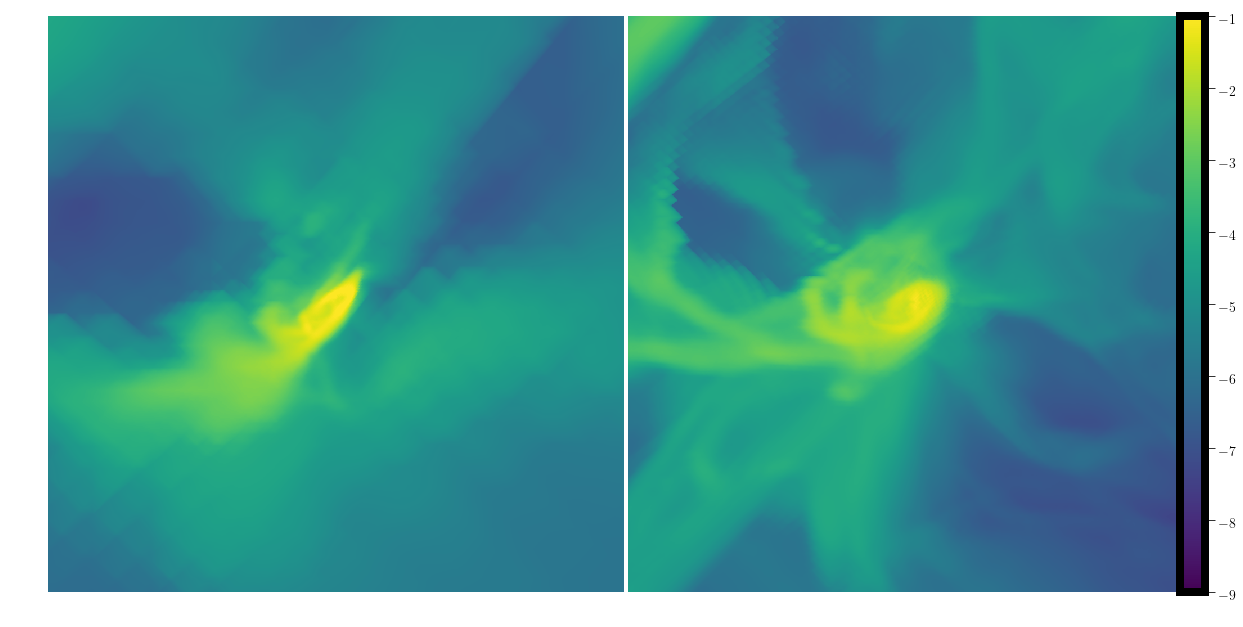

In [31]:
fig, axes = plt.subplots(1,2, figsize = (17.5,8))
im1 = axes[0].imshow(np.log10(sat_dens_1), vmin = -9, vmax = -1)
im2 = axes[1].imshow(np.log10(sat_dens_2), vmin = -9, vmax = -1)



cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)






In [32]:
'''
x,y = np.meshgrid(np.arange(N), np.arange(N))


mod = Sersic2D(amplitude = 0.0005, r_eff = 30, n=1, x_0=N/2., y_0=N/2.,
               ellip=.5, theta=-1)
sat_mstar_dens_1 = yt.YTArray(mod(x, y), 'g/cm**2')
sat_mstar_dens_2 = sat_mstar_dens_1.copy()
'''

sat_mstar_dens_1 = yt.off_axis_projection(ds1, cen1, -L_n1, W1, N, ('deposit', 'io_density'), north_vector =  north_vector)
sat_mstar_dens_2 = yt.off_axis_projection(ds2, cen2, -L_n2, W1, N, ('deposit', 'io_density'), north_vector =  north_vector)

In [33]:
kern = Gaussian2DKernel(10)
sat_mstar_dens_1_c = yt.YTArray(convolve_fft(sat_mstar_dens_1, kern), sat_mstar_dens_1.units)
sat_mstar_dens_2_c = yt.YTArray(convolve_fft(sat_mstar_dens_2, kern), sat_mstar_dens_2.units)


/anaconda2/lib/python2.7/site-packages/yt/units/yt_array.py:1293: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)


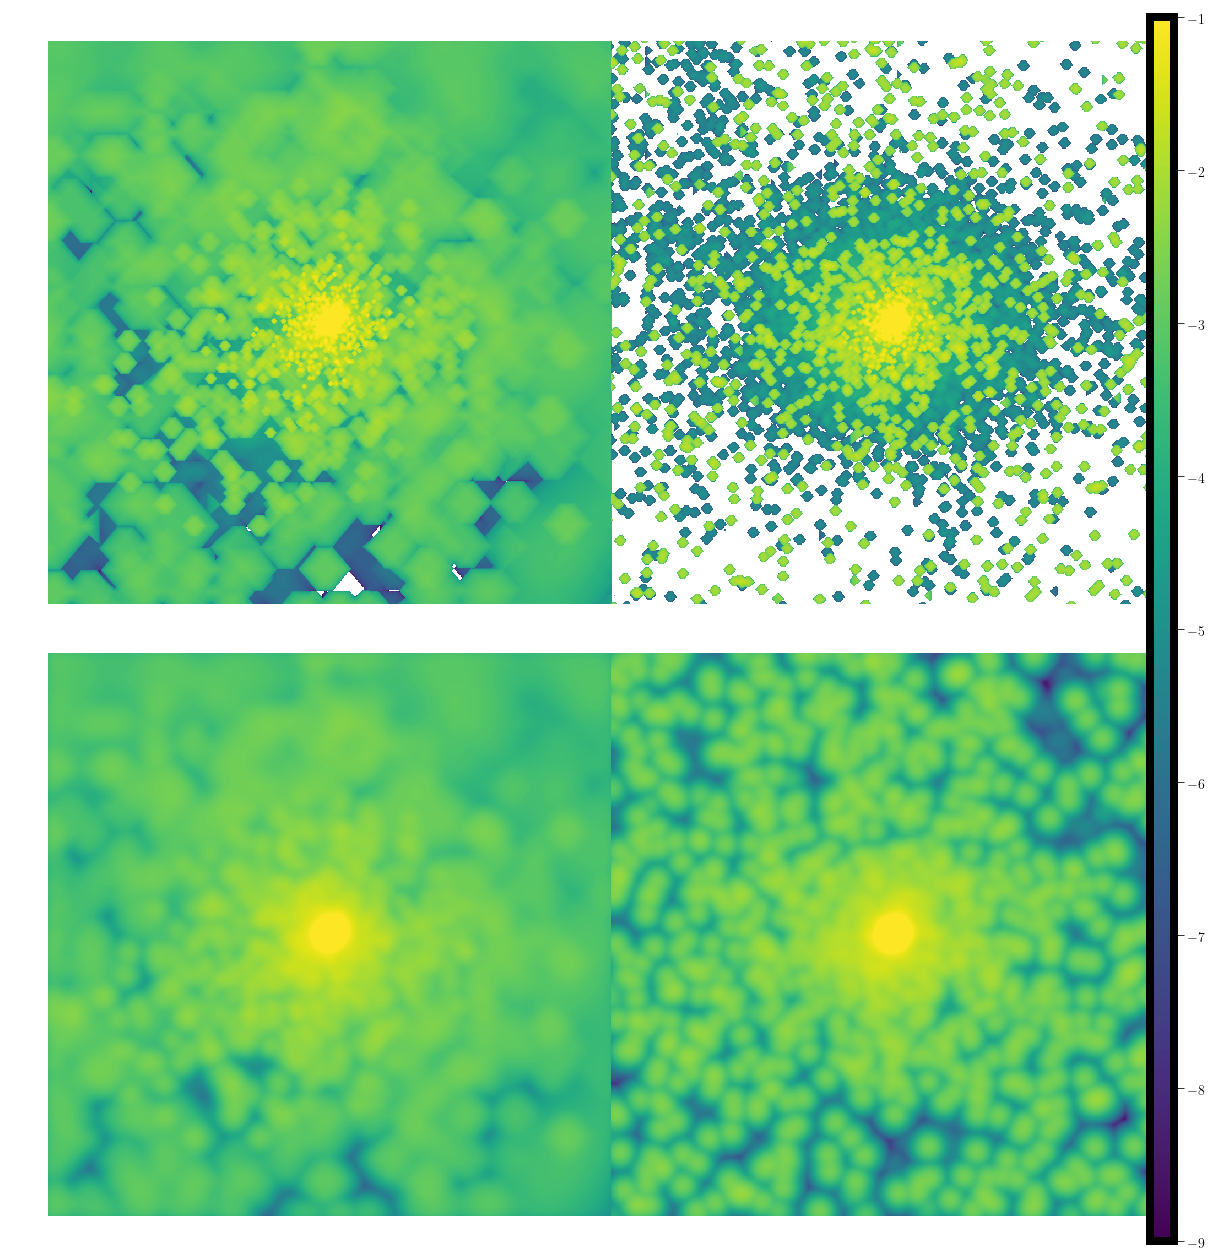

In [34]:
fig, axes = plt.subplots(2,2, figsize = (17.,17))
im1 = axes[0,0].imshow(np.log10(sat_mstar_dens_1), vmin = -9, vmax = -1)
im2 = axes[0,1].imshow(np.log10(sat_mstar_dens_2), vmin = -9, vmax = -1)

im3 = axes[1,0].imshow(np.log10(sat_mstar_dens_1_c), vmin = -9, vmax = -1)
im4 = axes[1,1].imshow(np.log10(sat_mstar_dens_2_c), vmin = -9, vmax = -1)


cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes.ravel():
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)





In [35]:
anch_force_1 = 2 * pi * G * sat_dens_1 * sat_mstar_dens_1_c
anch_force_2 = 2 * pi * G * sat_dens_2 * sat_mstar_dens_2_c



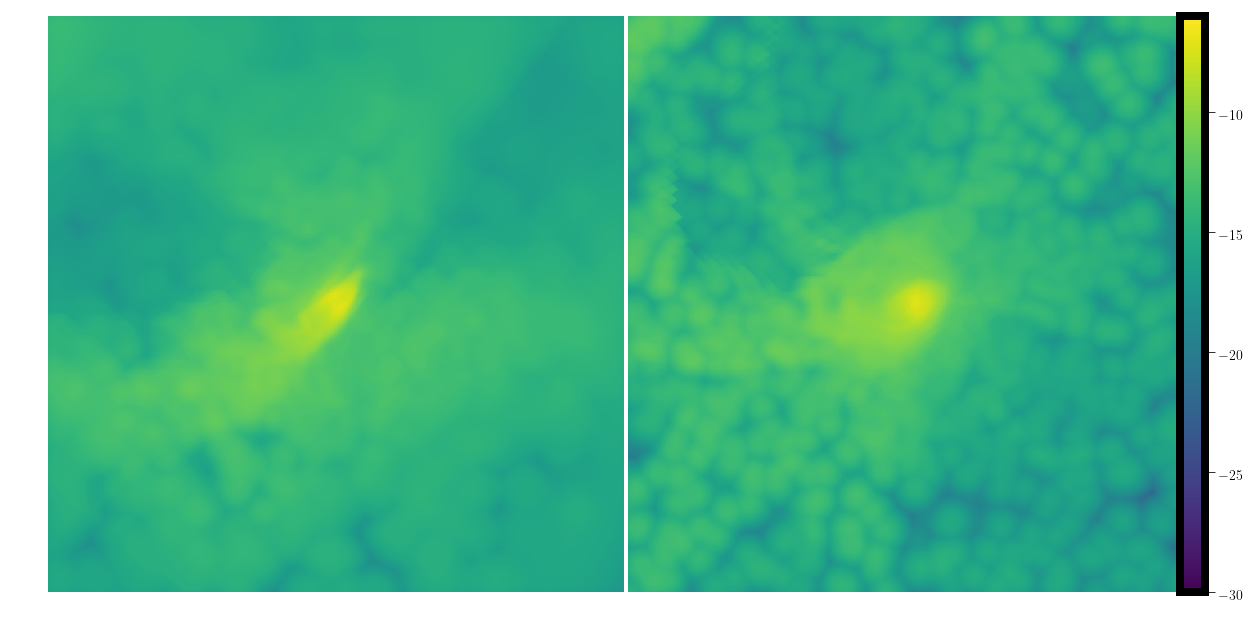

In [36]:
fig, axes = plt.subplots(1,2, figsize = (17.5,8))
im1 = axes[0].imshow(np.log10(anch_force_1),vmin = -30, vmax = -6)
im2 = axes[1].imshow(np.log10(anch_force_2),vmin = -30, vmax = -6)




cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)






In [ ]:
fig, axes = plt.subplots(1,1, figsize = (17.5,8))



anch_force_1_rav = anch_force_1.to('dyn/cm**2').value.ravel()
anch_force_1_rav = anch_force_1_rav[~isnan(anch_force_1_rav)]


anch_force_2_rav = anch_force_2.to('dyn/cm**2').value.ravel()
anch_force_2_rav = anch_force_2_rav[~isnan(anch_force_2_rav)]

bns = linspace(-20, -10, 100)

axes.hist(log10(anch_force_1_rav[anch_force_1_rav > 0]), histtype = 'step', label = 'natural', linewidth = 8, normed = True, bins = bns)
axes.hist(log10(anch_force_2_rav[anch_force_2_rav > 0]), histtype = 'step', label = 'forced', linewidth = 8, normed = True, bins = bns)
legend(loc = 2,  fontsize = 25)


axes.hist(log10(ram_pres_1_rav), histtype = 'step', linewidth = 4, linestyle = 'dashed', color = 'blue', normed = True, bins = bns)
axes.hist(log10(ram_pres_2_rav), histtype = 'step', linewidth = 4, linestyle = 'dashed', color = 'orange', normed = True, bins = bns)

axes.annotate('Ram Pressure', (0.3, 0.8), fontsize = 35, xycoords = 'axes fraction', color = 'black', fontweight = 'bold')
axes.annotate('Anchor Pressure', (0.65, 0.15), fontsize = 35, xycoords = 'axes fraction', color = 'black', fontweight = 'bold')


axes.set_xlabel(r'$\log_{10}$ Pressure (dyn cm$^{-2}$)', fontsize = 20)


fig.savefig('pressure_comparison.png', dpi = 400)




In [ ]:
fig, axes = plt.subplots(1,2, figsize = (17.5,8))

rat1 = anch_force_1/ram_pres_1
rat2 = anch_force_2/ram_pres_2

im1 = axes[0].imshow(log10(rat1), vmin = -10, vmax = 10., cmap = 'PiYG')
im2 = axes[1].imshow(log10(rat2), vmin = -10, vmax = 10., cmap = 'PiYG')

cax = fig.add_axes([0.90, 0.0, 0.02, 1.0])
cbr = fig.colorbar(im2, cax=cax,orientation="vertical")


for ax in axes:
    ax.axis('off')

fig.subplots_adjust(left = 0.0, right = 0.92, top =1.0, bottom = 0.0, hspace = 0.0, wspace = 0.0)


